# **PERKENALAN**

Nama : Andira Dzulkarnain

Batch : 006

Objective :

Perusahaan ini ingin melakukan digitalisasi real time berdasarkan informasi yang diberikan oleh calon nasabah yang diisi secara online. Untuk mengotomisasi proses ini kita perlu memprediksi informais yang diberikan oleh calon nasabah dan dengan bantuan machine learning diharapkan dapat dimunculkan prediksi apakah seseorang dapat diterima atau ditolak pengajuan kreditnya.

Link Hugging Face :

https://huggingface.co/spaces/Dzlkrn/ML2

Link Kaggle :

https://www.kaggle.com/datasets/ninzaami/loan-predication

## **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import phik
import imblearn

from numpy import array 
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.inspection import permutation_importance
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC

warnings.filterwarnings(action='ignore')

%matplotlib inline


# **DATA LOADING**

In [2]:
df = pd.read_csv('/Users/macbookpro2019/Library/CloudStorage/GoogleDrive-dzulkarnainan@gmail.com/My Drive/Hacktiv8/ML/Phase 1/ML_2/Loan Predication.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**INTEPRETASI TIAP KOLOM**

1. Loan_ID: ID unik untuk setiap pinjaman.

2. Gender: Jenis kelamin peminjam, dengan nilai-nilai adalah 'Male', 'Female', dan 'Other'.

3. Married: Status perkawinan peminjam, dengan nilai-nilai adalah 'Yes' (Sudah Menikah) dan 'No' (Belum Menikah).

4. Dependents: Jumlah tanggungan peminjam.

5. Education: Tingkat pendidikan peminjam, dengan nilai-nilai yang mungkin adalah 'Graduate' (Sudah Lulus) dan 'Not Graduate' (Belum 
Lulus).

6. Self_Employed: Status peminjam sebagai pekerja mandiri, dengan nilai-nilai yang mungkin adalah 'Yes' (Ya) dan 'No' (Tidak).

7. ApplicantIncome: Pendapatan peminjam.

8. CoapplicantIncome: Pendapatan pendamping peminjam.

9. LoanAmount: Jumlah pinjaman yang diminta oleh peminjam.

10. Loan_Amount_Term: Jangka waktu pinjaman dalam bulan.

11. Credit_History: Riwayat kredit peminjam, dengan nilai-nilai adalah 0 (Tidak Ada Riwayat Kredit) dan 1 (Ada Riwayat Kredit).

12. Property_Area: Lokasi properti peminjam, dengan nilai-nilai yang mungkin adalah 'Semiurban' (Setengah Perkotaan), 'Urban' (Perkotaan), dan 'Rural' (Pedesaan).

13. Loan_Status: Status pinjaman, dengan nilai-nilai yang mungkin adalah 'Y' (Disetujui) dan 'N' (Tidak Disetujui).


In [3]:
#mencari persebaran data target
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**Dari hasil diatas dapat dikatakan bahwa data ini *imbalance***

In [4]:
#mencari informasi tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **EXPLORATORARY DATA ANALYSIS (EDA)**

## 1. Sebaran Gender Calon Nasabah

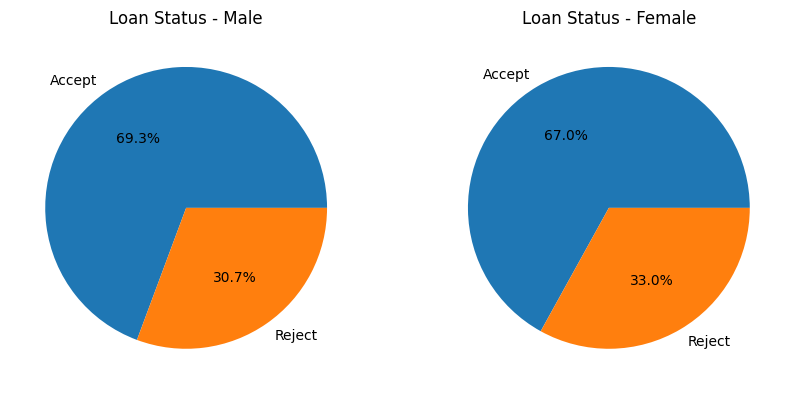

In [6]:
#labeling
labeling_eda_1 = {'Y': 'Accept', 'N': 'Reject'}

df['Loan_Status'] = df['Loan_Status'].map(labeling_eda_1)

#count male
eda_male_loan_status = df[df['Gender'] == 'Male']['Loan_Status'].value_counts()

#count female
eda_female_loan_status = df[df['Gender'] == 'Female']['Loan_Status'].value_counts()

plt.figure(figsize=(10, 6))

#subplot #1
plt.subplot(1, 2, 1)
plt.pie(eda_male_loan_status, labels=eda_male_loan_status.index, autopct='%1.1f%%')
plt.title('Loan Status - Male')

#subplot #2
plt.subplot(1, 2, 2)
plt.pie(eda_female_loan_status, labels=eda_female_loan_status.index, autopct='%1.1f%%')
plt.title('Loan Status - Female')

plt.show()


Berdasarkan visualisasi diatas, dpaat dilihat bahwa baik laki-laki maupun perempuan memiliki tingkat diterima dan di tolak pengajuan kredit yang sama. Hipotesis sementara peneliti, dimana gender tidak berpengaruh terhadap diterima atau ditolaknya pengajuan kredit

## 2. Jumlah Tanggungan Calon Nasabah dengan Status Pengajuan Kredit

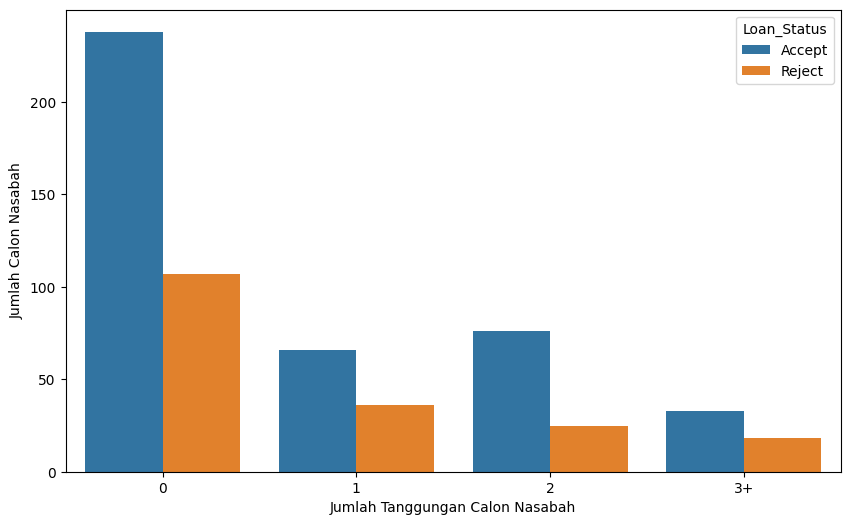

In [7]:
plt.figure(figsize=(10, 6))

#countplot dan labeling
ax = sns.countplot(x='Dependents', hue='Loan_Status', data=df)
ax.set_ylabel('Jumlah Calon Nasabah'),
ax.set_xlabel('Jumlah Tanggungan Calon Nasabah')

plt.show()


Dari visualisasi diatas, dapat dilihat bahwa calon nasabah yang tidak memiliki tanggungan memiliki tingkat diterima pada pengajuan kredit yang sangat tinggi dibanding yang telah memiliki tanggungan

## 3. Jumlah Pinjaman dengan Pendapatan Calon Nasabah

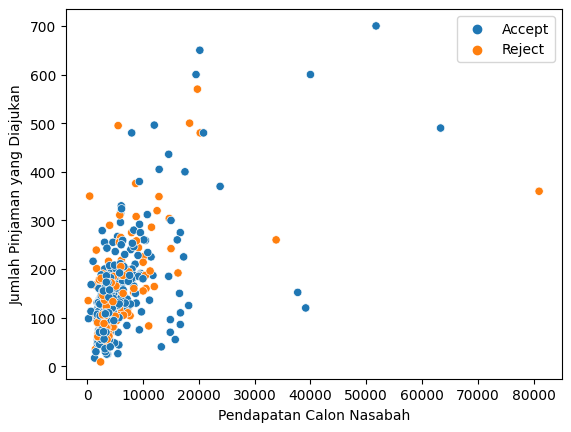

In [8]:
#pembuatan visualisasi
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, hue='Loan_Status')

#labeling sumbu
plt.xlabel('Pendapatan Calon Nasabah')
plt.ylabel('Jumlah Pinjaman yang Diajukan')

plt.legend()
plt.show()


Berdasarkan visualisasi diatas, dapat dikatakan tingkat pendapatan seorang calon nasabah sejalan dengan jumlah pinjaman yang diajukan juga.

# **DATA PREPROCESSING**


## **1. DATA FOR MODEL INFERENCE**

In [9]:
#mengambil data inference
df_inference = df.sample(10, random_state=10) 
df_inference

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
285,LP001924,Male,No,0,Graduate,No,3158,3053.0,89.0,360.0,1.0,Rural,Accept
323,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural,Accept
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Accept
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Accept
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,Reject
193,LP001658,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban,Accept
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,Reject
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Accept
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,Reject
566,LP002836,Male,No,0,Graduate,No,3333,0.0,70.0,360.0,1.0,Urban,Accept


In [10]:
#dropping data inference dari dataset raw
df_train_test = df.drop(df_inference.index)

In [11]:
#reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inference.reset_index(drop=True, inplace=True)

In [12]:
df_inference.to_csv('df_inference_P1M2')

## **2. DATA CLEANING**

### a. Data Duplikat

CEK DATA DUPLIKAT

In [13]:
#pengecekkan data duplikat pada dataframe
df_train_test[df_train_test.duplicated()].shape

(0, 13)

**Tidak terdapat data duplikat**

### b. Missing Values

CEK MV

In [14]:
#pengecekkan kolom-kolom yang memiliki missing value
kolom_missing = df_train_test.columns[df_train_test.isna().any()].tolist()

print(kolom_missing)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [15]:
#hitung jumlah kolom-kolom yang memiliki missing value
missing_values = df_train_test.isnull().sum()

print(missing_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


Berdasarkan hasil pengecekkan diatas, peneliti akan melakukan dropping row pada value yang terindikiasi MV. Akan tetapi untuk kolom 'LoanAmount' peneliti akan melakukan handling dengan mengisi MV dengan nilai rata-rata. Karena berdasarkan pemikirna pemeliti, hanya kolom tersebut yang dapat di handling.

## **3. FEATURE SELECTION**

interval columns not set, guessing: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


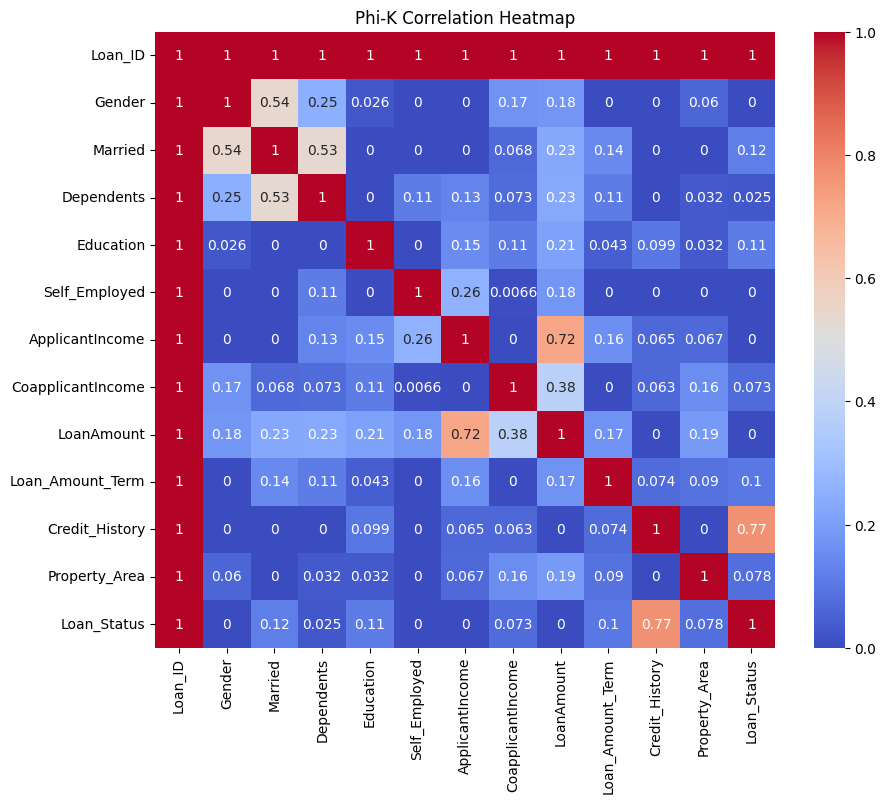

In [16]:
correlation_matrix = df.phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Phi-K Correlation Heatmap')
plt.show()


In [17]:
correlation_matrix = df.phik_matrix()
print(correlation_matrix)


interval columns not set, guessing: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
                   Loan_ID    Gender   Married  Dependents  Education   
Loan_ID                1.0  1.000000  1.000000    1.000000   1.000000  \
Gender                 1.0  1.000000  0.539952    0.251276   0.026393   
Married                1.0  0.539952  1.000000    0.533745   0.000000   
Dependents             1.0  0.251276  0.533745    1.000000   0.000000   
Education              1.0  0.026393  0.000000    0.000000   1.000000   
Self_Employed          1.0  0.000000  0.000000    0.112814   0.000000   
ApplicantIncome        1.0  0.000000  0.000000    0.131121   0.150838   
CoapplicantIncome      1.0  0.170974  0.068364    0.072556   0.113159   
LoanAmount             1.0  0.177720  0.227035    0.230588   0.210847   
Loan_Amount_Term       1.0  0.000000  0.144591    0.112723   0.042845   
Credit_History         1.0  0.000000  0.000000    0.000000   0.09911

Berdasarkan visualisasi diatas peneliti menetapkan batas minimal fitur yang akan digunakan adalah yang memiliki nilai diatas 0.1 maka dari itu berikut fitur yang diambil berdasarkan nilai uji korelasi phik diatas :

1. Married
2. Education
3. Loan_Amount_Term
4. Credit_History

Akan tetapi mempertimbangkan business knowledge terkait kredit dalam dunia perbankan dimana beberapa fitur juga penting untuk dipertimbangkan, peneliti akan tetap menggunakan beberap fitur dibawah meski berdasarkan nilai memang kecil :

5. ApplicantIncome
6. CoapplicantIncome
7. LoanAmount

## **4. DATA SPLIT**

In [17]:
df_train_test["Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)

In [18]:
df_train_test.to_csv('df_train_test.csv', index=False)

In [19]:
#menentukan kolom untuk target dan fitur
X = df_train_test.drop(['Loan_Status', 'Loan_ID', 'Gender', 'Self_Employed', 'Loan_Amount_Term', 'Property_Area'], axis=1)
y = df_train_test['Loan_Status']

In [20]:
#splitting data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [21]:
X_train

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
146,No,0,Graduate,10000,1666.0,225.0,1.0
510,No,0,Not Graduate,3400,0.0,95.0,1.0
343,Yes,0,Graduate,9083,0.0,228.0,1.0
274,Yes,0,Not Graduate,4100,0.0,124.0,NaN
370,Yes,0,Graduate,4310,0.0,130.0,NaN
...,...,...,...,...,...,...,...
369,Yes,3+,Graduate,8750,4996.0,130.0,1.0
320,Yes,0,Graduate,5818,2160.0,184.0,1.0
527,Yes,0,Graduate,6133,3906.0,324.0,1.0
125,Yes,3+,Graduate,23803,0.0,370.0,1.0


In [22]:
#cek outlier
handling_mv = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
skewness = X_train[handling_mv].skew()
print(skewness)

ApplicantIncome      6.391148
CoapplicantIncome    7.519621
LoanAmount           2.655689
dtype: float64


Berdasarkan hasil diatas, kolom numerikal semuanya terindikasi tidak terdistribusi normal, oleh karena itu pada pipeline peneliti akan handling dengan teknik IQR

## **5. PENGOLAHAN KOLOM NUMERIKAL DAN KATEGORIKAL**

In [24]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTENC

#define kolom numerik dan kategorik
fitur_numerik = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fitur_kategorik = ['Married', 'Dependents', 'Education', 'Credit_History']

num_cols = Pipeline([
    ('impute MV', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5))
])

cat_cols = Pipeline([
    ('impute MV', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder())
])

#pipeline sepenuhnya
full_pipeline = ColumnTransformer(
    transformers=[
        ("numerik", num_cols, fitur_numerik),
        ("kategorik", cat_cols, fitur_kategorik)
    ]
)


In [25]:
X_train.Credit_History.unique()

array([ 1., nan,  0.])

# **MODEL DEFINITON**

## **1. LOGISTIC REGRESSION**

In [27]:
#fungsi pipeline logreg
logreg_pipeline = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('logreg', LogisticRegression(random_state=0))
])

In [29]:
kf = KFold(n_splits=5)
scores_logreg = cross_val_score(logreg_pipeline, X_train, y_train, cv=kf)
print("Cross Validation array           :", scores_logreg)
print("Best Cross Validation score      :", scores_logreg.mean())
print("Standar Deviasi Cross Validation :",scores_logreg.std())


Cross Validation array           : [0.8        0.81176471 0.69047619 0.76190476 0.77380952]
Best Cross Validation score      : 0.7675910364145657
Standar Deviasi Cross Validation : 0.042472006692203225


## **2. SVM**

In [30]:
#fungsi pipeline SVM
pipe_svm = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('svm', SVC(random_state=0))
])


In [31]:
#cross-val SVC
kf=KFold(n_splits=5)
scoressvm = cross_val_score(pipe_svm, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoressvm)
print("Best Cross Validation score      :",scoressvm.mean())
print("Standar Deviasi Cross Validation :",scoressvm.std())

Cross Validation array           : [0.74117647 0.82352941 0.71428571 0.72619048 0.72619048]
Best Cross Validation score      : 0.7462745098039216
Standar Deviasi Cross Validation : 0.03955838654923315


## **3. DESCISION TREE**

In [32]:
#fungsi pipeline descision tree
pipe_dtc = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=0))
])

In [33]:
#cross-val decision tree
kf=KFold(n_splits=5)
scoresDT = cross_val_score(pipe_dtc, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoresDT)
print("Best Cross Validation score      :",scoresDT.mean())
print("Standar Deviasi Cross Validation :",scoresDT.std())

Cross Validation array           : [0.65882353 0.67058824 0.67857143 0.61904762 0.63095238]
Best Cross Validation score      : 0.6515966386554621
Standar Deviasi Cross Validation : 0.02291799309469495


## **4. RANDOM FORREST**

In [34]:
#fungsi random forrest
pipe_rfc = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=0))
])


In [35]:
#cross-val random forest
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipe_rfc, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

Cross Validation array           : [0.71764706 0.77647059 0.72619048 0.70238095 0.6547619 ]
Best Cross Validation score      : 0.7154901960784315
Standar Deviasi Cross Validation : 0.0392365490723305


## **5. KNN**

In [36]:
#fungsi KNN
pipe_knn = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('knn', KNeighborsClassifier())
])

In [37]:
#cross-val KNN
kf=KFold(n_splits=5)
scoresKNN = cross_val_score(pipe_knn, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoresKNN)
print("Best Cross Validation score      :",scoresKNN.mean())
print("Standar Deviasi Cross Validation :",scoresKNN.std())

Cross Validation array           : [0.71764706 0.75294118 0.73809524 0.72619048 0.64285714]
Best Cross Validation score      : 0.715546218487395
Standar Deviasi Cross Validation : 0.038231548846437605


## **6. NAIVE BAYES**

In [38]:
#fungsi Naive Bayes
pipe_nb = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('naive_bayes', GaussianNB())
])

In [39]:
#cross-val Naive Bayes
kf=KFold(n_splits=5)
scoresNB = cross_val_score(pipe_nb, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoresNB)
print("Best Cross Validation score      :",scoresNB.mean())
print("Standar Deviasi Cross Validation :",scoresNB.std())

Cross Validation array           : [0.78823529 0.85882353 0.83333333 0.76190476 0.79761905]
Best Cross Validation score      : 0.8079831932773109
Standar Deviasi Cross Validation : 0.03419937500401099


## **7. ADABOOST**

In [40]:
pipe_adaboost = imbpipe([
    ('preprocess', full_pipeline),
    ('over_sampl', SMOTENC([3, 4, 5, 6], sampling_strategy=0.9, random_state=42)),
    ('adaboost', AdaBoostClassifier(random_state=0))
])

In [41]:
#cross-val AdaBoosting
kf=KFold(n_splits=5)
scoresAdaBC = cross_val_score(pipe_adaboost, X_train, y_train, cv=kf)
print("Cross Validation array           :",scoresAdaBC)
print("Best Cross Validation score      :",scoresAdaBC.mean())
print("Standar Deviasi Cross Validation :",scoresAdaBC.std())

Cross Validation array           : [0.69411765 0.85882353 0.71428571 0.75       0.73809524]
Best Cross Validation score      : 0.7510644257703081
Standar Deviasi Cross Validation : 0.05723105183877655


Berdasarkan hasil cross-val diatas, didapatkan bahwa model terbaik adalah NAIVES BAYES

# **MODEL TRAINING & EVALUATION**

## **NAIVE BAYES**

TANPA ESTIMATOR

In [42]:
#model random forrest tanpa estimator
model_nb = pipe_nb.fit(X_train,y_train)
model_nb

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Married', 'Dependents',
                                                   'Education',
                                                   'Credit_History'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6], random_state=42,
                         sampling_strategy=0.9)),
                ('naive_bayes', GaussianNB())])

In [43]:
#model random forrest tanpa estimator
model_nb = pipe_nb.fit(X_train,y_train)
model_nb

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Married', 'Dependents',
                                                   'Education',
                                                   'Credit_History'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6], random_state=42,
                         sampling_strategy=0.9)),
                ('naive_bayes', GaussianNB())])

In [44]:
#skoring data train & test tanpa
y_pred_train_nb = model_nb.predict(X_train)
y_pred_test_nb = model_nb.predict(X_test)
print('Accuracy score train : ',accuracy_score(y_train,y_pred_train_nb))
print('Accuracy score test : ',accuracy_score(y_test,y_pred_test_nb))

Accuracy score train :  0.8080568720379147
Accuracy score test :  0.8131868131868132


In [45]:
#hasil prediksi tanpa estimator
print(classification_report(y_train,y_pred_train_nb))

print(classification_report(y_test,y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60       140
           1       0.78      0.99      0.87       282

    accuracy                           0.81       422
   macro avg       0.87      0.72      0.74       422
weighted avg       0.84      0.81      0.78       422

              precision    recall  f1-score   support

           0       0.83      0.39      0.53        49
           1       0.81      0.97      0.88       133

    accuracy                           0.81       182
   macro avg       0.82      0.68      0.71       182
weighted avg       0.82      0.81      0.79       182



DENGAN HYPERPARAMETER

In [46]:
#hyperparameter
param_grid = {
    'naive_bayes__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [47]:
#gridsearch
nb_gs = GridSearchCV(estimator=pipe_nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

#hyperparameter
nb_gs.fit(X_train, y_train)

#estimator terbaik
best_nb_model = nb_gs.best_estimator_

#best hyperparam
best_params = nb_gs.best_params_
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best hyperparameters: {'naive_bayes__var_smoothing': 1e-09}


Berdasarkan hasil hyperparameter diatas, ditemukan bahwa best param-nya adalah default

In [48]:
#skoring data train & test dengan estimator
y_pred_train_nb_gs = best_nb_model.predict(X_train)
y_pred_test_nb_gs = best_nb_model.predict(X_test)

# Evaluasi model
print('Accuracy score train : ', accuracy_score(y_train, y_pred_train_nb_gs))
print('Accuracy score test : ', accuracy_score(y_test, y_pred_test_nb_gs))


Accuracy score train :  0.8080568720379147
Accuracy score test :  0.8131868131868132


In [49]:
##hasil prediksi dengan estimator
print(classification_report(y_train,y_pred_train_nb_gs))

print(classification_report(y_test,y_pred_test_nb_gs))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60       140
           1       0.78      0.99      0.87       282

    accuracy                           0.81       422
   macro avg       0.87      0.72      0.74       422
weighted avg       0.84      0.81      0.78       422

              precision    recall  f1-score   support

           0       0.83      0.39      0.53        49
           1       0.81      0.97      0.88       133

    accuracy                           0.81       182
   macro avg       0.82      0.68      0.71       182
weighted avg       0.82      0.81      0.79       182



# **MODEL SAVNING**

In [50]:
#fungsi Naive Bayes untuk model saving
pipe_nb_save = imbpipe([
    ('preprocess', full_pipeline),
    ('naive_bayes', GaussianNB())
])

In [51]:
#model naive bayes untuk model saving
model_nb_save = pipe_nb_save.fit(X_train,y_train)
model_nb_save

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both'))]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('impute MV',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Married', 'Dependents',
                                                   'Education',
                                                   'Credit_History'])])),
                ('naive_bayes', GaussianNB())])

In [52]:
joblib.dump(model_nb_save, 'model_nb_save')

['model_nb_save']

In [53]:
X_train

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
146,No,0,Graduate,10000,1666.0,225.0,1.0
510,No,0,Not Graduate,3400,0.0,95.0,1.0
343,Yes,0,Graduate,9083,0.0,228.0,1.0
274,Yes,0,Not Graduate,4100,0.0,124.0,NaN
370,Yes,0,Graduate,4310,0.0,130.0,NaN
...,...,...,...,...,...,...,...
369,Yes,3+,Graduate,8750,4996.0,130.0,1.0
320,Yes,0,Graduate,5818,2160.0,184.0,1.0
527,Yes,0,Graduate,6133,3906.0,324.0,1.0
125,Yes,3+,Graduate,23803,0.0,370.0,1.0


# **MODEL INFERENCE**

Model Inference dilakukan di notebook terpisah

# **CONCLUSION**

**MODEL ANALYSIS**

Berdasarkan hasil pemilihan model, ditunjukan bahwa Naive Bayes mendapatkan nilai *cross-val* terbaik. Setelah itu setelah dilakukan hyperparameter tunning, tidak ada perbedaan sebelum dan sesudah dilakukan hyperparameter.

Akan tetapi berdasarkan hasil skor accuracy, nilainya juga tidak jauh antar nilai train dan test. Dimana dapat dikatakan bahwa model ini tergolong *best fit*, akan tetapi nilai yang masih dikisaran 80% peneliti menyarankan bahwa model ini masih perlu di evaluasi.

Kedepannya pemilihan fitur serta model lain patut dipertimbangkan untuk meningkatkan tingkat akurasi dari model.

**OVERALL ANALYSIS**

Dari hasil diatas, peneliti menggunakan *business knowledge* yang sebelumnya pernah dipelajari terkait kredit dimana pada saat uji koerlasi ditemukan beberapa fitur yang peneliti kira penting, akan tetapi memiliki nilai korelasi yang rendah.

Oleh karena itu peneliti menambahkan beberapa fitur yang memang secara nilai uji korelasi kecil, akan tetapi berdasarkan *business knowledge* berpengaruh.

Model yang peneliti buat dapat dikatakan *goodfit* akan tetapi masih perlu improvement, oleh karena itu model ini tidak sepenuhnya dapat di implementasikan pada perusahaan, akan tetapi model ini dapat membantu penilaian pengajuan kredit tradisional yang sudah berjalan sebelumnya. Sebagai media crosscheck saja, tapi jangan dijadikan patokan keputusan kredit diterima atau ditolak pengajuannya.

Dimana dengan *improvement* yang lebih baik peneliti yakin bahwa model ini dapat membantu tim dari *Account Officer* (tim yang biasanya mencari calon nasabah yang ingin meminjam uang ke pihak bank) dalam melakukan penilaian calon nasabah kredit, dimana dapat mempersingkat waktu penilaian dan diharapkan dapat meningkatkan keuntungan karena tim Account Officer tidak salah menilai calon nasabah yang akan merugikan perusahaan